In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
data=pd.read_csv('IT24103804_scaling.csv')

In [47]:
data= data.drop(columns=['student_id'])

count    4018.000000
mean        0.298616
std         0.339608
min         0.000000
25%         0.000000
50%         0.204549
75%         0.591583
max         1.000000
Name: starting_salary_usd, dtype: float64


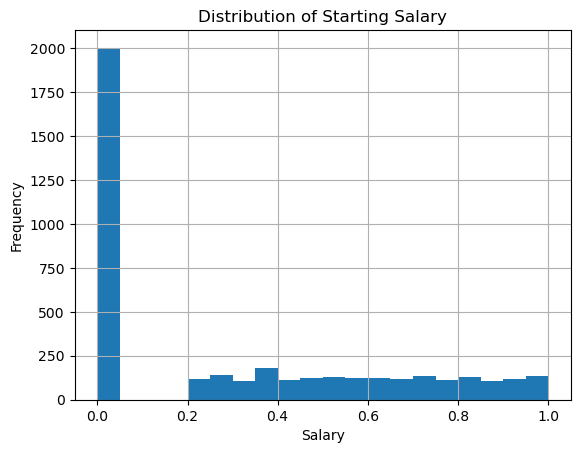

In [48]:
print(data['starting_salary_usd'].describe())
# Visualize distribution
data['starting_salary_usd'].hist(bins=20)
plt.title('Distribution of Starting Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()






In [49]:
data['starting_salary_usd']


0       0.242883
1       0.219806
2       0.365432
3       0.000000
4       0.000000
          ...   
4013    0.657418
4014    0.217719
4015    0.672151
4016    0.000000
4017    0.482005
Name: starting_salary_usd, Length: 4018, dtype: float64

In [50]:
# Define bins for normalized data (0 to 1)
bins = [0, 0.333, 0.667, 1.0]
labels = ['Low', 'Medium', 'High']


data['Salary_Bin'] = pd.cut(data['starting_salary_usd'], bins=bins, labels=labels, include_lowest=True)

# Check bin distribution
print(data['Salary_Bin'].value_counts())

Salary_Bin
Low       2326
Medium     874
High       818
Name: count, dtype: int64


In [51]:
# after creating salary bin feature . we do not drop starting salary usd feature because when we evaluvate decision tree model,Random Forest model that they can handle continuous variable and The continuous "starting salary" has  exact salary values

In [52]:
data['Salary_Bin'].unique()

['Low', 'Medium', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [53]:
# salary Bin has categoriacl data . Therfore it should be label encoded. 

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
label = LabelEncoder()


In [56]:
data['Salary_Bin'] = label.fit_transform(data['Salary_Bin'])

In [57]:
data['Salary_Bin'].unique()

array([1, 2, 0])

Feature Selection Techniques

In [58]:
print("Number of features before used Variance Treshold:")
data.shape

Number of features before used Variance Treshold:


(4018, 208)

In [60]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  
reduced_data = selector.fit_transform(data.drop('placement_status', axis=1))



In [61]:
print("Number of features after used Variance Treshold:")
data.shape

Number of features after used Variance Treshold:


(4018, 208)

In [62]:
#Variance Treshold is used to find constant features . 
#But in this data set doesn't have constant features or low variance features to drop .

In [64]:
import numpy as np

In [65]:
corr_matrix = data.corr(numeric_only=True)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
data_filtered = data.drop(to_drop, axis=1)
print("Dropped due to correlation:", len(to_drop))


Dropped due to correlation: 36


In [66]:
print("Columns dropped due to high correlation:")
print(to_drop)


Columns dropped due to high correlation:
['university_name_American University of Sharjah', 'university_name_BITS Pilani', 'university_name_Heidelberg University', 'university_name_IISc Bangalore', 'university_name_IIT Bombay', 'university_name_IIT Madras', 'university_name_Kazan Federal University', 'university_name_LUT University', 'university_name_Maynooth University', 'university_name_McGill University', 'university_name_NIT Trichy', 'university_name_National University of Ireland Galway', 'university_name_Novosibirsk State University', "university_name_Queen's University", 'university_name_Rhodes University', 'university_name_Saint Petersburg State University', 'university_name_Stellenbosch University', 'university_name_Tampere University', 'university_name_UCLA', 'university_name_University College Cork', 'university_name_University of Alberta', 'university_name_University of Birmingham', 'university_name_University of Cambridge', 'university_name_University of Cape Town', 'unive

In [67]:
data_filtered.shape

(4018, 172)

In [68]:
data_filtered.to_csv("IT24100391_Feature_Engineering_Part_02.csv", index=False)
